In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [ ]:
Data= requests.get("https://www.amazon.com/s?i=stripbooks&bbn=1&rh=n%3A283155%2Cn%3A1&s=salesrank&dc&Adv-Srch-Books-Submit.x=44&Adv-Srch-Books-Submit.y=15&field-dateop=After&field-dateyear=2008&qid=1602235473&unfiltered=1&ref=sr_ex_n_1", headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
soup= BeautifulSoup(Data.content, 'html.parser')
#print(soup.prettify())

In [ ]:
import time
interest = soup.find(class_='s-main-slot s-result-list s-search-results sg-row')
my_interest = interest.find_all(class_='a-section a-spacing-medium')
#titless = my_interest.find_all(class_='a-badge-text')
#titles = titless.find_all('span')
#print(my_interest)
#for title in titless:
#    tit = title.get_text()
#    print(tit)
    #print(title.prettify())
    
for book in my_interest:
    bestsellerTitle = book.find(class_='a-badge-text')
    bestsellerTag = bestsellerTitle.get_text()
    #print(bestsellerTag)
    
    bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
    title = bookTitle.get_text()
    #print(title)
    
    bookLink = book.find(class_='a-link-normal a-text-normal')
    link = "https://www.amazon.com/"+bookLink.get('href')
    #print(link)
    
    bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
    bookSubCategoryTitle = bookSubCategory.get_text()
    #print(bookSubCategoryTitle)
    #print(title.prettify())
    
    request = requests.get (link,headers = {"User-Agent":"Google Chrome 85.0  (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    soup1= BeautifulSoup(request.content, 'html.parser')
    
    time.sleep(65)
    
    bookLink= soup1.find_all(class_='a-link-normal a-color-tertiary')
    #print(bookLink)
    bookCategory= bookLink[1].get_text()
    #print(bookCategory)
    
    
    #print("---------------------")

In [121]:
pages = []
currentPage = 1
selectedYear = 2009

year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear="+str(selectedYear)+"&unfiltered=1&ref=sr_adv_b"
    #pages.append(url)
    print("PAGE "+ str(currentPage))
    print(url)
    data = requests.get(url, headers = {"User-Agent":"Google Chrome 85.0  (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    year9 = BeautifulSoup(data.content, 'html.parser')
    
    interest = year9.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        year.append(selectedYear)
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        title = bookTitle.get_text()
        print(title)
        titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2009&unfiltered=1&ref=sr_adv_b
Unable to get data for this page
---------------------
PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2009&unfiltered=1&ref=sr_adv_b
Best Seller
Dr. Seuss's Beginner Book Collection (Cat in the Hat, One Fish Two Fish, Green Eggs and Ham, Hop on Pop, Fox in Socks)
---------------------
Harry Potter Paperback Box Set (Books 1-7)
---------------------
The Hiccupotamus
---------------------
Emotional Intelligence 2.0
---------------------
The Things They Carried
---------------------
The 4-Hour Workweek: Escape 9-5, Live Anywhere, and Join the New Rich
---------------------
One, Two...Boo!
---------------------
The Case of the Bizarre Bouquets: An Enola Holmes Mystery
---------------------
Harry Potter an

In [157]:
import pandas as pd
books_2009 = pd.DataFrame({'year': year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
#print(books_2009)

In [125]:
books_2009.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2009_file.csv', header=True)

In [126]:
pages = []
currentPage = 1
selectedYear = 2010

year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear="+str(selectedYear)+"&unfiltered=1&ref=sr_adv_b"
    #pages.append(url)
    print("PAGE "+ str(currentPage))
    print(url)
    data = requests.get(url, headers = {"User-Agent":"Google Chrome 85.0  (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    year9 = BeautifulSoup(data.content, 'html.parser')
    
    interest = year9.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        year.append(selectedYear)
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        title = bookTitle.get_text()
        print(title)
        titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2010&unfiltered=1&ref=sr_adv_b
Best Seller
First Little Readers Parent Pack: Guided Reading Level A: 25 Irresistible Books That Are Just the Right Level for Beginning Readers
---------------------
Best Seller
The Gifts of Imperfection: Let Go of Who You Think You're Supposed to Be and Embrace Who You Are
---------------------
The Wonky Donkey
---------------------
Best Seller
The Unofficial Harry Potter Cookbook: From Cauldron Cakes to Knickerbocker Glory--More Than 150 Magical Recipes for Wizards and Non-Wizards Alike (Unofficial Cookbook)
---------------------
Tartine Bread (Artisan Bread Cookbook, Best Bread Recipes, Sourdough Book)
---------------------
First Little Readers Parent Pack: Guided Reading Level B: 25 Irresistible Books That Are Just the Right Level for Beginning Readers
---------------------
Best Seller
First Little Re

In [127]:
books_2010 = pd.DataFrame({'year': year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
books_2010.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2010_file.csv', header=True)

In [135]:
pages = []
currentPage = 1
selectedYear = 2011

year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear="+str(selectedYear)+"&unfiltered=1&ref=sr_adv_b"
    #pages.append(url)
    print("PAGE "+ str(currentPage))
    print(url)
    data = requests.get(url, headers = {"User-Agent":"Safari (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    year9 = BeautifulSoup(data.content, 'html.parser')
    
    interest = year9.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        year.append(selectedYear)
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        title = bookTitle.get_text()
        print(title)
        titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2011&unfiltered=1&ref=sr_adv_b
Best Seller
The Warmth of Other Suns: The Epic Story of America's Great Migration
---------------------
Best Seller
The Secret Lake: A children's mystery adventure
---------------------
Best Seller
First 100 Words
---------------------
Holiday Gift Guide
National Geographic Little Kids First Big Book of Why (National Geographic Little Kids First Big Books)
---------------------
Best Seller
A Long Walk to Water: Based on a True Story
---------------------
Best Seller
Go the F**k to Sleep
---------------------
Best Seller
Crucial Conversations Tools for Talking When Stakes Are High, Second Edition
---------------------
Start with Why: How Great Leaders Inspire Everyone to Take Action
---------------------
Outliers: The Story of Success
---------------------
Holiday Gift Guide
How Do Dinosaurs Say Happy Birt

In [136]:
books_2011 = pd.DataFrame({'year': year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
books_2011.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2011_file.csv', header=True)

In [139]:
pages = []
currentPage = 1
selectedYear = 2012

year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear="+str(selectedYear)+"&unfiltered=1&ref=sr_adv_b"
    #pages.append(url)
    print("PAGE "+ str(currentPage))
    print(url)
    data = requests.get(url, headers = {"User-Agent":"Opera (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    year9 = BeautifulSoup(data.content, 'html.parser')
    
    interest = year9.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        year.append(selectedYear)
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        title = bookTitle.get_text()
        print(title)
        titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2012&unfiltered=1&ref=sr_adv_b
Best Seller
Chicka Chicka Boom Boom (Board Book)
---------------------
Best Seller
Giraffes Can't Dance
---------------------
Best Seller
The Harbinger: The Ancient Mystery that Holds the Secret of America's Future
---------------------
Best Seller
The Care and Keeping of You: The Body Book for Younger Girls, Revised Edition (American Girl Library)
---------------------
Best Seller
Room on the Broom
---------------------
Best Seller
Attached: The New Science of Adult Attachment and How It Can Help YouFind - and Keep - Love
---------------------
Best Seller
Wonder
---------------------
Best Seller
The Whole-Brain Child: 12 Revolutionary Strategies to Nurture Your Child's Developing Mind
---------------------
5,000 Awesome Facts (About Everything!) (National Geographic Kids)
---------------------
Goodnight 

KeyboardInterrupt: 

In [141]:
books_2012 = pd.DataFrame({'year': year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
books_2012.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2012_file.csv', header=True)

In [143]:
pages = []
currentPage = 1
selectedYear = 2013

year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear="+str(selectedYear)+"&unfiltered=1&ref=sr_adv_b"
    #pages.append(url)
    print("PAGE "+ str(currentPage))
    print(url)
    data = requests.get(url, headers = {"User-Agent":"Safari 74.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    year9 = BeautifulSoup(data.content, 'html.parser')
    
    interest = year9.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        year.append(selectedYear)
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        title = bookTitle.get_text()
        print(title)
        titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2013&unfiltered=1&ref=sr_adv_b
Unable to get data for this page
---------------------
PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2013&unfiltered=1&ref=sr_adv_b
Unable to get data for this page
---------------------
PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2013&unfiltered=1&ref=sr_adv_b
The Never Girls Collection #1 (Disney: The Never Girls): Books 1-4
---------------------
Best Seller
The Total Money Makeover: Classic Edition: A Proven Plan for Financial Fitness
---------------------
World of Eric Carle, Around the Farm 30-Button Sound Book - PI Kids (Play-A-Sound)
---------------------
You Are a Badass: How to Stop D

In [144]:
books_2013 = pd.DataFrame({'year': year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
books_2013.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2013_file.csv', header=True)

In [145]:
pages = []
currentPage = 1
selectedYear = 2014

year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear="+str(selectedYear)+"&unfiltered=1&ref=sr_adv_b"
    #pages.append(url)
    print("PAGE "+ str(currentPage))
    print(url)
    data = requests.get(url, headers = {"User-Agent":"Safari 74.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    year9 = BeautifulSoup(data.content, 'html.parser')
    
    interest = year9.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        year.append(selectedYear)
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        title = bookTitle.get_text()
        print(title)
        titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2014&unfiltered=1&ref=sr_adv_b
Best Seller
Player's Handbook (Dungeons & Dragons)
---------------------
Percy Jackson and the Olympians 5 Book Paperback Boxed Set (new covers w/poster) (Percy Jackson & the Olympians)
---------------------
The Alchemist, 25th Anniversary: A Fable About Following Your Dream
---------------------
Best Seller
World of Eric Carle, Hear Bear Roar 30 Animal Sound Book - PI Kids (Play-A-Sound)
---------------------
Dungeons & Dragons Monster Manual (Core Rulebook, D&D Roleplaying Game)
---------------------
Best Seller
P is for Potty! (Sesame Street) (Lift-the-Flap)
---------------------
Best Seller
New Morning Mercies: A Daily Gospel Devotional
---------------------
Best Seller
The Itsy Bitsy Pumpkin
---------------------
Corduroy
---------------------
Best Seller
DBT® Skills Training Handouts and Worksheets,

In [146]:
books_2014 = pd.DataFrame({'year': year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
books_2014.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2014_file.csv', header=True)

In [148]:
pages = []
currentPage = 1
selectedYear = 2015

year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear="+str(selectedYear)+"&unfiltered=1&ref=sr_adv_b"
    #pages.append(url)
    print("PAGE "+ str(currentPage))
    print(url)
    data = requests.get(url, headers = {"User-Agent":"Chrome 81.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    year9 = BeautifulSoup(data.content, 'html.parser')
    
    interest = year9.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        year.append(selectedYear)
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        title = bookTitle.get_text()
        print(title)
        titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2015&unfiltered=1&ref=sr_adv_b
Unable to get data for this page
---------------------
PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2015&unfiltered=1&ref=sr_adv_b
Best Seller
The Body Keeps the Score: Brain, Mind, and Body in the Healing of Trauma
---------------------
Best Seller
The 5 Love Languages: The Secret to Love that Lasts
---------------------
Best Seller
I Love You to the Moon and Back
---------------------
Best Seller
Burn After Writing
---------------------
Notorious RBG: The Life and Times of Ruth Bader Ginsburg
---------------------
Best Seller
School Zone - Multiplication 0-12 Flash Cards - Ages 8+, 3rd Grade, 4th Grade, Elementary Math, Multiplication Facts, Common Core, and More
---------------------
Best Seller


In [149]:
books_2015 = pd.DataFrame({'year': year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
books_2015.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2015_file.csv', header=True)

In [151]:
pages = []
currentPage = 1
selectedYear = 2016

year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear="+str(selectedYear)+"&unfiltered=1&ref=sr_adv_b"
    #pages.append(url)
    print("PAGE "+ str(currentPage))
    print(url)
    data = requests.get(url, headers = {"User-Agent":"Operamini (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    year9 = BeautifulSoup(data.content, 'html.parser')
    
    interest = year9.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        year.append(selectedYear)
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        title = bookTitle.get_text()
        print(title)
        titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2016&unfiltered=1&ref=sr_adv_b
Best Seller
Little Blue Truck's Halloween
---------------------
Best Seller
I Dissent: Ruth Bader Ginsburg Makes Her Mark
---------------------
Best Seller
What to Expect When You're Expecting
---------------------
The Subtle Art of Not Giving a F*ck: A Counterintuitive Approach to Living a Good Life
---------------------
Best Seller
The Daily Stoic: 366 Meditations on Wisdom, Perseverance, and the Art of Living
---------------------
Best Seller
The Road Back to You: An Enneagram Journey to Self-Discovery
---------------------
Best Seller
The Complete Mediterranean Cookbook: 500 Vibrant, Kitchen-Tested Recipes for Living and Eating Well Every Day
---------------------
Cravings: Recipes for All the Food You Want to Eat: A Cookbook
---------------------
Never Split the Difference: Negotiating As If Your Lif

In [152]:
books_2016 = pd.DataFrame({'year': year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
books_2016.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2016_file.csv', header=True)

In [153]:
pages = []
currentPage = 1
selectedYear = 2017

year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear="+str(selectedYear)+"&unfiltered=1&ref=sr_adv_b"
    #pages.append(url)
    print("PAGE "+ str(currentPage))
    print(url)
    data = requests.get(url, headers = {"User-Agent":"Operamini 10.2 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    year9 = BeautifulSoup(data.content, 'html.parser')
    
    interest = year9.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        year.append(selectedYear)
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        title = bookTitle.get_text()
        print(title)
        titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2017&unfiltered=1&ref=sr_adv_b
Best Seller
Spooky Pookie (Little Pookie)
---------------------
Rich Dad Poor Dad: What the Rich Teach Their Kids About Money That the Poor and Middle Class Do Not!
---------------------
Best Seller
I Am Confident, Brave & Beautiful: A Coloring Book for Girls
---------------------
Best Seller
Pete the Cat: Trick or Pete
---------------------
Best Seller
Salt, Fat, Acid, Heat: Mastering the Elements of Good Cooking
---------------------
Best Seller
Extreme Ownership: How U.S. Navy SEALs Lead and Win (New Edition)
---------------------
Best Seller
Boundaries Updated and Expanded Edition: When to Say Yes, How to Say No To Take Control of Your Life
---------------------
Best Seller
A Guide to the Project Management Body of Knowledge (PMBOK® Guide)–Sixth Edition
---------------------
Best Seller
Chakra Healing

In [154]:
books_2017 = pd.DataFrame({'year': year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
books_2017.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2017_file.csv', header=True)

In [155]:
pages = []
currentPage = 1
selectedYear = 2018

year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear="+str(selectedYear)+"&unfiltered=1&ref=sr_adv_b"
    #pages.append(url)
    print("PAGE "+ str(currentPage))
    print(url)
    data = requests.get(url, headers = {"User-Agent":"Operamini 10.2 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    year9 = BeautifulSoup(data.content, 'html.parser')
    
    interest = year9.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        year.append(selectedYear)
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        title = bookTitle.get_text()
        print(title)
        titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2018&unfiltered=1&ref=sr_adv_b
My Own Words
---------------------
Best Seller
School Zone - Big Preschool Workbook - Ages 4 and Up, Colors, Shapes, Numbers 1-10, Alphabet, Pre-Writing, Pre-Reading, Phonics, and More (School Zone Big Workbook Series)
---------------------
Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones
---------------------
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)
---------------------
Where the Crawdads Sing
---------------------
Best Seller
White Fragility: Why It's So Hard for White People to Talk About Racism
---------------------
Becoming
---------------------
Best Seller
How to Catch a Mermaid
---------------------
Best Seller
Let That Sh*t Go: A Journal for Leaving Your Bullsh*t Behind and Creating a Happy Life (Zen as F*ck Journals)
-------------

In [156]:
books_2018 = pd.DataFrame({'year': year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
books_2018.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2018_file.csv', header=True)

In [159]:
pages = []
currentPage = 1
selectedYear = 2019

year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear="+str(selectedYear)+"&unfiltered=1&ref=sr_adv_b"
    #pages.append(url)
    print("PAGE "+ str(currentPage))
    print(url)
    data = requests.get(url, headers = {"User-Agent":"Operamini 5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    year9 = BeautifulSoup(data.content, 'html.parser')
    
    interest = year9.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        year.append(selectedYear)
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        title = bookTitle.get_text()
        print(title)
        titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
https://www.amazon.com/s?i=stripbooks&s=salesrank&page=1&Adv-Srch-Books-Submit.x=19&Adv-Srch-Books-Submit.y=12&field-dateop=During&field-dateyear=2019&unfiltered=1&ref=sr_adv_b
Best Seller
The Home Edit: A Guide to Organizing and Realizing Your House Goals (Includes Refrigerator Labels)
---------------------
How to Be an Antiracist
---------------------
Best Seller
Publication Manual of the American Psychological Association: 7th Edition, 2020 Copyright
---------------------
Best Seller
Official SAT Study Guide 2020 Edition
---------------------
Best Seller
The Little Old Lady Who Was Not Afraid of Anything
---------------------
Best Seller
Saunders Comprehensive Review for the NCLEX-RN Examination
---------------------
Best Seller
The Boy, the Mole, the Fox and the Horse
---------------------
Best Seller
How to Catch a Unicorn
---------------------
The Silent Patient
---------------------
Best Seller
Paint by Sticker Kids: Unicorns & Magic: Create 10 Pictures One Sticker at a T

In [160]:
books_2019 = pd.DataFrame({'year': year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
books_2019.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2019_file.csv', header=True)

In [164]:
amazonbooks_09 = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2009_file.csv')
#print(amazonbooks_09)
amazonbooks_10 = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2010_file.csv')
amazonbooks_11 = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2011_file.csv')
amazonbooks_12 = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2012_file.csv')
amazonbooks_13 = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2013_file.csv')
amazonbooks_14 = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2014_file.csv')
amazonbooks_15 = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2015_file.csv')
amazonbooks_16 = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2016_file.csv')
amazonbooks_17 = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2017_file.csv')
amazonbooks_18 = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2018_file.csv')
amazonbooks_19 = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5\books_2019_file.csv')

In [170]:
all_year_books = pd.concat([amazonbooks_09,amazonbooks_10,amazonbooks_11,amazonbooks_12,amazonbooks_13,amazonbooks_14,amazonbooks_15,amazonbooks_16,amazonbooks_17,amazonbooks_18,amazonbooks_19])
#all_year_books.drop(columns=['Unnamed: 0'])
all_year_books

Unnamed: 0  year                                              title  \
0              0  2009  Dr. Seuss's Beginner Book Collection (Cat in t...   
1              1  2009         Harry Potter Paperback Box Set (Books 1-7)   
2              2  2009                                   The Hiccupotamus   
3              3  2009                         Emotional Intelligence 2.0   
4              4  2009                            The Things They Carried   
...          ...   ...                                                ...   
1195        1195  2019                   National Registry Paramedic Prep   
1196        1196  2019                          Roblox: Where's the Noob?   
1197        1197  2019                            I Am Perfectly Designed   
1198        1198  2019                                   Heretics of Dune   
1199        1199  2019  Spirituality Before Religions: Spirituality is...   

      isBestSelling         subcategory  
0              True  Poetry Anthologies  
1             False                 NaN  
2             False                 NaN  
3             False                 NaN  
4             False                 NaN  
...             ...                 ...  
1195          False                 NaN  
1196          False                 NaN  
1197          False                 NaN  
1198          False                 NaN  
1199          False                 NaN  

[12800 rows x 5 columns]

In [187]:
allTimeBestSelling = all_year_books[all_year_books['isBestSelling'] == True]

In [190]:
allTimeBestSelling1= allTimeBestSelling.groupby('subcategory')['subcategory'].count()
#allTimeBestSelling1

# BREAK

In [5]:
pages = []
currentPage = 1
selectedCategory = 'Art_and_Photography'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A1&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=43&Adv-Srch-Books-Submit.y=3&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Firefox 2.2 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    artPhoto = BeautifulSoup(data.content, 'html.parser')
    
    interest = artPhoto.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1

PAGE 1
Oct 4, 2020
Best Seller
Hollywood Propaganda: How TV, Movies, and Music Shape Our Culture
---------------------
Oct 6, 2020
Best Seller
Humans
---------------------
Sep 29, 2020
Best Seller
The Meaning of Mariah Carey
---------------------
Oct 6, 2020
Best Seller
Is This Anything?
---------------------
Jan 1, 2015
Best Seller
The 5 Love Languages: The Secret to Love that Lasts
---------------------
Sep 29, 2020
Best Seller
Violet Bent Backwards Over the Grass
---------------------
Oct 1, 2010
Best Seller
First Little Readers Parent Pack: Guided Reading Level A: 25 Irresistible Books That Are Just the Right Level for Beginning Readers
---------------------
Oct 6, 2020
Best Seller
The 99% Invisible City: A Field Guide to the Hidden World of Everyday Design
---------------------
Oct 6, 2020
Best Seller
Let Love Rule
---------------------
Nov 13, 2017
Best Seller
I Am Confident, Brave & Beautiful: A Coloring Book for Girls
---------------------
Oct 14, 2020
Best Seller
Loving: A Pho

In [16]:
#print(mainCategory)
#print(pub_year)
#len(pub_year)
#len(mainCategory)
#len(titles)
#len(isBestSelling)
#len(subCategories)
#print(titles)
#print(isBestSelling)
#print(subCategories)
artPhoto_books = pd.DataFrame({'mainCategory': mainCategory, 'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
artPhoto_books['pub_year'] = pd.DatetimeIndex(artPhoto_books['pub_year']).year
#artPhoto_books
artPhoto_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\artPhoto_books_file.csv', header=True)

In [21]:
#artPhoto_books ['pub_year'] = pd.to_datetime(artPhoto_books['pub_year'], format = '%Y').dt.year
#artPhoto_books_Yfilter= artPhoto_books.groupby('pub_year')['pub_year'].count()
#artPhoto_books_Yfilter

In [22]:
pages = []
currentPage = 1
selectedCategory = 'Biographies_and_Memoirs'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A2&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=28&Adv-Srch-Books-Submit.y=5&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Google Chrome 87.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    bioMemo = BeautifulSoup(data.content, 'html.parser')
    
    interest = bioMemo.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Sep 15, 2020
Best Seller
Rage
---------------------
Sep 8, 2020
Best Seller
Disloyal: A Memoir: The True Story of the Former Personal Attorney to President Donald J. Trump
---------------------
Mar 10, 2020
Best Seller
Untamed
---------------------
Sep 22, 2020
Best Seller
Solutions and Other Problems
---------------------
Sep 29, 2020
Best Seller
The Meaning of Mariah Carey
---------------------
Oct 6, 2020
Best Seller
Is This Anything?
---------------------
Sep 8, 2020
Best Seller
Killing Crazy Horse: The Merciless Indian Wars in America (Bill O'Reilly's Killing Series)
---------------------
Aug 7, 2018
Best Seller
My Own Words
---------------------
Jan 1, 2015
Best Seller
The 5 Love Languages: The Secret to Love that Lasts
---------------------
Oct 6, 2020
Best Seller
Undaunted: My Fight Against America's Enemies, At Home and Abroad
---------------------
Jul 14, 2020
Too Much and Never Enough: How My Family Created the World's Most Dangerous Man
---------------------
Sep 8, 2

In [23]:
import pandas as pd
bioMemo_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
bioMemo_books['pub_year'] = pd.DatetimeIndex(bioMemo_books['pub_year']).year
bioMemo_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\bioMemo_books_file.csv', header=True)

In [24]:
pages = []
currentPage = 1
selectedCategory = 'Business_and_Money'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A3&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=33&Adv-Srch-Books-Submit.y=14&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Opera-mini 7.54 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    busiMoney = BeautifulSoup(data.content, 'html.parser')
    
    interest = busiMoney.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
        
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Oct 16, 2018
Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones
---------------------
Apr 11, 2017
Rich Dad Poor Dad: What the Rich Teach Their Kids About Money That the Poor and Middle Class Do Not!
---------------------
Aug 18, 2020
Doesn't Hurt to Ask: Using the Power of Questions to Communicate, Connect, and Persuade
---------------------
Oct 9, 2018
Dare to Lead: Brave Work. Tough Conversations. Whole Hearts.
---------------------
Nov 21, 2017
Best Seller
Extreme Ownership: How U.S. Navy SEALs Lead and Win (New Edition)
---------------------
Sep 17, 2013
Best Seller
The Total Money Makeover: Classic Edition: A Proven Plan for Financial Fitness
---------------------
Oct 13, 2020
Best Seller
The Path: Accelerating Your Journey to Financial Freedom
---------------------
Oct 18, 2016
Best Seller
The Daily Stoic: 366 Meditations on Wisdom, Perseverance, and the Art of Living
---------------------
Sep 8, 2020
Best Seller
No Rules Rules: Netflix and the Cult

In [25]:
busiMoney_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
busiMoney_books['pub_year'] = pd.DatetimeIndex(busiMoney_books['pub_year']).year
busiMoney_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\busiMoney_books_file.csv', header=True)

In [100]:
pages = []
currentPage = 1
selectedCategory = 'Children_Book'

mainCategorys = []
pub_years = []
titless = []
subCategoriess = []
isBestSellings = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A4&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=25&Adv-Srch-Books-Submit.y=9&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Operamini (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    childBook = BeautifulSoup(data.content, 'html.parser')
    
    interest = childBook.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategorys.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_years.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_years.append(date)
        
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSellings.append(True)
        else :
            isBestSellings.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titless.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategoriess.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategoriess.append("")
            
        print("---------------------")
    currentPage = currentPage + 1

PAGE 1
Sep 1, 2020
Best Seller
Dog Man: Grime and Punishment: From the Creator of Captain Underpants (Dog Man #9) (9)
---------------------
Sep 29, 2020
Best Seller
The Office: A Day at Dunder Mifflin Elementary
---------------------
Oct 6, 2020
Best Seller
The Tower of Nero (Trials of Apollo, The Book Five) (Trials of Apollo, 5)
---------------------
Oct 27, 2020
Best Seller
The Deep End (Diary of a Wimpy Kid Book 15)
---------------------
Jul 5, 2016
Best Seller
Little Blue Truck's Halloween
---------------------
Jun 7, 2018
Best Seller
School Zone - Big Preschool Workbook - Ages 4 and Up, Colors, Shapes, Numbers 1-10, Alphabet, Pre-Writing, Pre-Reading, Phonics, and More (School Zone Big Workbook Series)
---------------------
Jul 25, 2017
Best Seller
Spooky Pookie (Little Pookie)
---------------------
Mar 3, 2015
Best Seller
I Love You to the Moon and Back
---------------------
Sep 20, 2016
I Dissent: Ruth Bader Ginsburg Makes Her Mark
---------------------
Jul 23, 2019
Best Seller


In [104]:
children_books = pd.DataFrame({'mainCategory': mainCategorys,'pub_year': pub_years,'title': titless,'isBestSelling': isBestSellings,'subcategory': subCategoriess})
children_books['pub_year'] = pd.DatetimeIndex(children_books['pub_year']).year
children_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\children_books_file.csv', header=True)
#children_books

In [30]:
#children_books.groupby('pub_year')['pub_year'].count()

In [105]:
pages = []
currentPage = 1
selectedCategory = 'Christain_Book'

mainCategoryc = []
pub_yearc = []
titlesc = []
subCategoriesc = []
isBestSellingc = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A12290&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=38&Adv-Srch-Books-Submit.y=11&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Safari 7.0(Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    christBook = BeautifulSoup(data.content, 'html.parser')
    
    interest = christBook.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategoryc.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_yearc.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_yearc.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSellingc.append(True)
        else :
            isBestSellingc.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titlesc.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategoriesc.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategoriesc.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Mar 10, 2020
Best Seller
Untamed
---------------------
Sep 1, 2020
Best Seller
The Harbinger II: The Return
---------------------
Sep 29, 2020
Best Seller
Live Not by Lies: A Manual for Christian Dissidents
---------------------
Sep 29, 2020
Best Seller
The Immortality Key: The Secret History of the Religion with No Name
---------------------
Jan 1, 2015
Best Seller
The 5 Love Languages: The Secret to Love that Lasts
---------------------
Jan 28, 2020
Best Seller
Get Out of Your Head: Stopping the Spiral of Toxic Thoughts
---------------------
Sep 30, 2020
Best Seller
This Means War: We Will Not Surrender Through Silence
---------------------
Sep 29, 2020
Best Seller
When Women Pray: 10 Women of the Bible Who Changed the World through Prayer
---------------------
Jan 3, 2012
Best Seller
The Harbinger: The Ancient Mystery that Holds the Secret of America's Future
---------------------
Sep 17, 2013
Best Seller
The Total Money Makeover: Classic Edition: A Proven Plan for Financial 

In [107]:
christain_books = pd.DataFrame({'mainCategory': mainCategoryc,'pub_year': pub_yearc,'title': titlesc,'isBestSelling': isBestSellingc,'subcategory': subCategoriesc})
christain_books['pub_year'] = pd.DatetimeIndex(christain_books['pub_year']).year
christain_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\christain_books_file.csv', header=True)

In [108]:
pages = []
currentPage = 1
selectedCategory = 'Comic_and_Graphics'

mainCategoryz = []
pub_yearz = []
titlesz = []
subCategoriesz = []
isBestSellingz = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A4366&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=30&Adv-Srch-Books-Submit.y=4&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"internet explorer (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    comGraphics = BeautifulSoup(data.content, 'html.parser')
    
    interest = comGraphics.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategoryz.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_yearz.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_yearz.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSellingz.append(True)
        else :
            isBestSellingz.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titlesz.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategoriesz.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategoriesz.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Sep 22, 2020
Best Seller
Solutions and Other Problems
---------------------
Oct 22, 2019
Best Seller
The Boy, the Mole, the Fox and the Horse
---------------------
Oct 6, 2020
Best Seller
My Hero Academia, Vol. 25 (25)
---------------------
Oct 29, 2013
Best Seller
Hyperbole and a Half: Unfortunate Situations, Flawed Coping Mechanisms, Mayhem, and Other Things That Happened
---------------------
Mar 26, 2019
Best Seller
The Boys Omnibus Vol. 1 TPB
---------------------
Oct 27, 2020
Thoughts of Dog
---------------------
Jul 16, 2019
Best Seller
Avatar, The Last Airbender: The Rise of Kyoshi (The Kyoshi Novels)
---------------------
Nov 13, 2012
Best Seller
The Complete Calvin and Hobbes
---------------------
Oct 15, 2013
Best Seller
Uzumaki (3-in-1 Deluxe Edition) (Junji Ito)
---------------------
Oct 16, 2018
Tokyo Ghoul Complete Box Set: Includes vols. 1-14 with premium
---------------------
Apr 2, 2019
Best Seller
Marvel Encyclopedia, New Edition
---------------------
Oct 23, 

In [110]:
comicGraphic_books = pd.DataFrame({'mainCategory': mainCategoryz,'pub_year': pub_yearz,'title': titlesz,'isBestSelling': isBestSellingz,'subcategory': subCategoriesz})
comicGraphic_books['pub_year'] = pd.DatetimeIndex(comicGraphic_books['pub_year']).year
comicGraphic_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\comicGraphic_books_file.csv', header=True)

In [33]:
pages = []
currentPage = 1
selectedCategory = 'Computer_and_Technology'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A5&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=26&Adv-Srch-Books-Submit.y=8&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"internet-explorer (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    compTech = BeautifulSoup(data.content, 'html.parser')
    
    interest = compTech.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Unable to get data for this page
---------------------
PAGE 1
Sep 8, 2020
Best Seller
No Rules Rules: Netflix and the Culture of Reinvention
---------------------
Sep 22, 2020
#DELETED: Big Tech's Battle to Erase the Trump Movement and Steal the Election
---------------------
Jul 1, 2015
Best Seller
Cracking the Coding Interview: 189 Programming Questions and Solutions
---------------------
Dec 27, 2011
Start with Why: How Great Leaders Inspire Everyone to Take Action
---------------------
Oct 1, 2010
Best Seller
First Little Readers Parent Pack: Guided Reading Level C: 25 Irresistible Books That Are Just the Right Level for Beginning Readers
---------------------
May 3, 2019
Best Seller
Python Crash Course, 2nd Edition: A Hands-On, Project-Based Introduction to Programming
---------------------
May 8, 2020
Animal Crossing: New Horizons Official Companion Guide
---------------------
Apr 12, 2019
Best Seller
CompTIA A+ Certification All-in-One Exam Guide, Tenth Edition (Exams 220

In [34]:
compTech_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
compTech_books['pub_year'] = pd.DatetimeIndex(compTech_books['pub_year']).year
compTech_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\compTech_books_file.csv', header=True)

In [88]:
pages = []
currentPage = 1
selectedCategory = 'Cookbooks_Food_Wine'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A6&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=28&Adv-Srch-Books-Submit.y=19&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"internet-explorer 8.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    cookbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = cookbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Unable to get data for this page
---------------------
PAGE 1
Unable to get data for this page
---------------------
PAGE 1
Unable to get data for this page
---------------------
PAGE 1
Oct 6, 2020
Best Seller
Modern Comfort Food: A Barefoot Contessa Cookbook
---------------------
Sep 29, 2020
Best Seller
The Happy in a Hurry Cookbook: 100-Plus Fast and Easy New Recipes That Taste Like Home (The Happy Cookbook Series)
---------------------
Sep 22, 2020
Just Feed Me: Simply Delicious Recipes from My Heart to Your Plate
---------------------
Sep 29, 2020
Best Seller
True Comfort: More Than 100 Cozy Recipes Free of Gluten and Refined Sugar: A Gluten Free Cookbook
---------------------
Sep 15, 2020
Best Seller
Skinnytaste Meal Prep: Healthy Make-Ahead Meals and Freezer Recipes to Simplify Your Life: A Cookbook
---------------------
Oct 6, 2020
Jacques Pépin Quick & Simple
---------------------
Sep 22, 2020
Best Seller
The Full Plate: Flavor-Filled, Easy Recipes for Families with No 

In [89]:
cookFoodWine_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
cookFoodWine_books['pub_year'] = pd.DatetimeIndex(cookFoodWine_books['pub_year']).year
cookFoodWine_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\cookFoodWine_books_file.csv', header=True)

In [37]:
pages = []
currentPage = 1
selectedCategory = 'Crafts_Hobbies_Home'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A48&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=20&Adv-Srch-Books-Submit.y=16&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Konqueror (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    craftsHHbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = craftsHHbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Sep 29, 2020
Best Seller
True Comfort: More Than 100 Cozy Recipes Free of Gluten and Refined Sugar: A Gluten Free Cookbook
---------------------
Mar 19, 2019
Best Seller
The Home Edit: A Guide to Organizing and Realizing Your House Goals (Includes Refrigerator Labels)
---------------------
Sep 15, 2020
Best Seller
Skinnytaste Meal Prep: Healthy Make-Ahead Meals and Freezer Recipes to Simplify Your Life: A Cookbook
---------------------
Nov 13, 2017
Best Seller
I Am Confident, Brave & Beautiful: A Coloring Book for Girls
---------------------
Jul 3, 2018
Best Seller
Let That Sh*t Go: A Journal for Leaving Your Bullsh*t Behind and Creating a Happy Life (Zen as F*ck Journals)
---------------------
Sep 3, 2019
Best Seller
Paint by Sticker Kids: Halloween: Create 10 Pictures One Sticker at a Time! Includes Glow-in-the-Dark Stickers
---------------------
Mar 6, 2018
Best Seller
Zen as F*ck (Zen as F*ck Journals)
---------------------
Dec 27, 2016
Best Seller
The Complete Mediterranean

In [39]:
craftHob_Home_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
craftHob_Home_books['pub_year'] = pd.DatetimeIndex(craftHob_Home_books['pub_year']).year
craftHob_Home_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\craftHob_Home_books_file.csv', header=True)

In [40]:
pages = []
currentPage = 1
selectedCategory = 'Education_and_Reference'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A21&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=23&Adv-Srch-Books-Submit.y=17&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Konqueror (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    eduReferencebooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = eduReferencebooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Sep 8, 2015
Best Seller
The Body Keeps the Score: Brain, Mind, and Body in the Healing of Trauma
---------------------
Aug 4, 2015
Best Seller
Burn After Writing
---------------------
Oct 1, 2019
Best Seller
Publication Manual of the American Psychological Association: 7th Edition, 2020 Copyright
---------------------
May 7, 2019
Best Seller
Official SAT Study Guide 2020 Edition
---------------------
Aug 19, 2014
Best Seller
Player's Handbook (Dungeons & Dragons)
---------------------
Oct 1, 2010
Best Seller
First Little Readers Parent Pack: Guided Reading Level A: 25 Irresistible Books That Are Just the Right Level for Beginning Readers
---------------------
Oct 6, 2020
Best Seller
The 99% Invisible City: A Field Guide to the Hidden World of Everyday Design
---------------------
Apr 23, 2020
Best Seller
Rand McNally 2021 Large Scale Road Atlas (Rand McNally Road Atlas)
---------------------
Oct 7, 2019
Best Seller
Saunders Comprehensive Review for the NCLEX-RN Examination
-----

In [41]:
eduReference_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
eduReference_books['pub_year'] = pd.DatetimeIndex(eduReference_books['pub_year']).year
eduReference_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\eduReference_books_file.csv', header=True)

In [42]:
pages = []
currentPage = 1
selectedCategory = 'Health_Fitness_Dieting'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A10&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=18&Adv-Srch-Books-Submit.y=7&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Internet Explorer (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    healthFitDiet_books = BeautifulSoup(data.content, 'html.parser')
    
    interest = healthFitDiet_books.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Unable to get data for this page
---------------------
PAGE 1
Mar 10, 2020
Best Seller
Untamed
---------------------
Sep 8, 2020
Think Like a Monk: Train Your Mind for Peace and Purpose Every Day
---------------------
Sep 8, 2015
Best Seller
The Body Keeps the Score: Brain, Mind, and Body in the Healing of Trauma
---------------------
Oct 16, 2018
Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones
---------------------
Sep 29, 2020
Didn't See That Coming: Putting Life Back Together When Your World Falls Apart
---------------------
Nov 7, 1997
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)
---------------------
May 26, 2020
Best Seller
Breath: The New Science of a Lost Art
---------------------
Oct 1, 2019
Best Seller
Publication Manual of the American Psychological Association: 7th Edition, 2020 Copyright
---------------------
Aug 19, 2014
Best Seller
Player's Handbook (Dungeons & Dragons)
---------------------
Oct 22, 20

In [43]:
healthFitness_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
healthFitness_books['pub_year'] = pd.DatetimeIndex(healthFitness_books['pub_year']).year
healthFitness_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\healthFitness_books_file.csv', header=True)

In [44]:
pages = []
currentPage = 1
selectedCategory = 'History'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A9&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=15&Adv-Srch-Books-Submit.y=19&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Internet Explorer 17.1 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    historybooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = historybooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Aug 4, 2020
Best Seller
Caste (Oprah's Book Club): The Origins of Our Discontents
---------------------
Sep 8, 2020
Best Seller
Disloyal: A Memoir: The True Story of the Former Personal Attorney to President Donald J. Trump
---------------------
Sep 8, 2020
Best Seller
Killing Crazy Horse: The Merciless Indian Wars in America (Bill O'Reilly's Killing Series)
---------------------
Sep 29, 2020
Best Seller
The Immortality Key: The Secret History of the Religion with No Name
---------------------
Sep 29, 2020
Best Seller
Live Not by Lies: A Manual for Christian Dissidents
---------------------
Jul 14, 2020
Too Much and Never Enough: How My Family Created the World's Most Dangerous Man
---------------------
Aug 13, 2019
How to Be an Antiracist
---------------------
Sep 29, 2020
The Man Who Ran Washington: The Life and Times of James A. Baker III
---------------------
Oct 6, 2020
Best Seller
Trust: America's Best Chance
---------------------
Sep 29, 2020
His Very Best: Jimmy Carter, 

In [45]:
history_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
history_books['pub_year'] = pd.DatetimeIndex(history_books['pub_year']).year
history_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\history_books_file.csv', header=True)

In [46]:
pages = []
currentPage = 1
selectedCategory = 'Humour_and_Entertainment'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A86&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=14&Adv-Srch-Books-Submit.y=14&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Safari 64.5 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    humourEntbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = humourEntbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Oct 4, 2020
Best Seller
Hollywood Propaganda: How TV, Movies, and Music Shape Our Culture
---------------------
Sep 22, 2020
Best Seller
Solutions and Other Problems
---------------------
Oct 6, 2020
Best Seller
Is This Anything?
---------------------
Sep 29, 2020
Best Seller
Trumpty Dumpty Wanted a Crown: Verses for a Despotic Age
---------------------
Sep 29, 2020
Best Seller
Violet Bent Backwards Over the Grass
---------------------
Aug 19, 2014
Best Seller
Player's Handbook (Dungeons & Dragons)
---------------------
Oct 6, 2020
Best Seller
The 99% Invisible City: A Field Guide to the Hidden World of Everyday Design
---------------------
Oct 27, 2015
Notorious RBG: The Life and Times of Ruth Bader Ginsburg
---------------------
Nov 13, 2017
Best Seller
I Am Confident, Brave & Beautiful: A Coloring Book for Girls
---------------------
May 19, 2020
Best Seller
The Ballad of Songbirds and Snakes (A Hunger Games Novel)
---------------------
Jul 3, 2018
Best Seller
Let That Sh*t G

In [47]:
humourEntertain_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
humourEntertain_books['pub_year'] = pd.DatetimeIndex(humourEntertain_books['pub_year']).year
humourEntertain_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\humourEntertain_books_file.csv', header=True)

In [48]:
pages = []
currentPage = 1
selectedCategory = 'Law'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A10777&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=38&Adv-Srch-Books-Submit.y=12&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Lynx (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    lawbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = lawbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Unable to get data for this page
---------------------
PAGE 1
Sep 8, 2020
Best Seller
Disloyal: A Memoir: The True Story of the Former Personal Attorney to President Donald J. Trump
---------------------
Oct 6, 2020
Best Seller
Follow the Money: The Shocking Deep State Connections of the Anti-Trump Cabal
---------------------
Aug 7, 2018
My Own Words
---------------------
Oct 27, 2015
Notorious RBG: The Life and Times of Ruth Bader Ginsburg
---------------------
Nov 13, 2018
Becoming
---------------------
Sep 29, 2020
Where Law Ends: Inside the Mueller Investigation
---------------------
Aug 18, 2015
Best Seller
Just Mercy: A Story of Justice and Redemption
---------------------
May 1, 2018
Best Seller
The Color of Law: A Forgotten History of How Our Government Segregated America
---------------------
Jan 7, 2020
The New Jim Crow: Mass Incarceration in the Age of Colorblindness
---------------------
Apr 2, 2017
Best Seller
The LSAT Trainer: A Remarkable Self-Study Guide For The 

In [49]:
law_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
law_books['pub_year'] = pd.DatetimeIndex(law_books['pub_year']).year
law_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\law_books_file.csv', header=True)

In [59]:
pages = []
currentPage = 1
selectedCategory = 'LGBT'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A301889&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=32&Adv-Srch-Books-Submit.y=18&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"IE 2.1 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    LGBTbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = LGBTbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Unable to get data for this page
---------------------
PAGE 1
Oct 14, 2020
Best Seller
Loving: A Photographic History of Men in Love 1850s-1950s
---------------------
May 15, 2018
Best Seller
Badass Affirmations: The Wit and Wisdom of Wild Women (Inspirational Quotes and Daily Affirmations for Women)
---------------------
Oct 7, 2020
Brothersong (Green Creek)
---------------------
Sep 29, 2020
Best Seller
Confess: The Autobiography
---------------------
Jul 10, 2018
Best Seller
Hocus Pocus and the All-New Sequel
---------------------
Dec 18, 2018
They Both Die at the End
---------------------
May 29, 2018
The Seven Husbands of Evelyn Hugo: A Novel
---------------------
Jun 4, 2019
Best Seller
On Earth We're Briefly Gorgeous: A Novel
---------------------
Sep 1, 2020
I Have Something to Tell You: A Memoir
---------------------
Sep 29, 2020
Best Seller
The Legend of Korra: Ruins of the Empire Library Edition
---------------------
May 14, 2019
Red, White & Royal Blue: A Novel
-----

In [60]:
LGBT_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
LGBT_books['pub_year'] = pd.DatetimeIndex(LGBT_books['pub_year']).year
LGBT_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\LGBT_books_file.csv', header=True)
#len(pub_year)

In [61]:
pages = []
currentPage = 1
selectedCategory = 'Literature_and_Fiction'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A17&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=31&Adv-Srch-Books-Submit.y=6&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"   
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"IE 2.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    litFictbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = litFictbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Sep 29, 2020
Best Seller
The Return
---------------------
Oct 6, 2020
Leave the World Behind: A Novel
---------------------
Sep 15, 2020
The Evening and the Morning (Kingsbridge)
---------------------
Oct 6, 2020
Best Seller
The Searcher: A Novel
---------------------
Oct 6, 2020
Troubles in Paradise (Paradise (3))
---------------------
Jun 2, 2020
The Vanishing Half: A Novel
---------------------
Sep 1, 2020
Best Seller
The Harbinger II: The Return
---------------------
Sep 29, 2020
Best Seller
Trumpty Dumpty Wanted a Crown: Verses for a Despotic Age
---------------------
Sep 8, 2020
Anxious People: A Novel
---------------------
Sep 22, 2020
The Book of Two Ways: A Novel
---------------------
Aug 14, 2018
Where the Crawdads Sing
---------------------
Sep 29, 2020
Battle Ground (Dresden Files)
---------------------
Sep 29, 2020
Best Seller
Violet Bent Backwards Over the Grass
---------------------
Jan 21, 2020
American Dirt (Oprah's Book Club): A Novel
---------------------
Sep 

In [62]:
literatureFict_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
literatureFict_books['pub_year'] = pd.DatetimeIndex(literatureFict_books['pub_year']).year
literatureFict_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\literatureFict_books_file.csv', header=True)

In [63]:
pages = []
currentPage = 1
selectedCategory = 'Mystery_Thriller_Suspense'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A18&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=33&Adv-Srch-Books-Submit.y=9&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"IE 78 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    MTSbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = MTSbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Oct 6, 2020
Leave the World Behind: A Novel
---------------------
Sep 15, 2020
The Evening and the Morning (Kingsbridge)
---------------------
Oct 6, 2020
Best Seller
The Searcher: A Novel
---------------------
Oct 13, 2020
Best Seller
A Time for Mercy (Jake Brigance)
---------------------
Sep 1, 2020
Best Seller
The Harbinger II: The Return
---------------------
Sep 29, 2020
Battle Ground (Dresden Files)
---------------------
Jun 2, 2020
The Guest List: A Novel
---------------------
Jan 21, 2020
American Dirt (Oprah's Book Club): A Novel
---------------------
Sep 15, 2020
Troubled Blood (A Cormoran Strike Novel, 5)
---------------------
Sep 1, 2020
All the Devils Are Here: A Novel (Chief Inspector Gamache Novel, 16)
---------------------
Feb 5, 2019
The Silent Patient
---------------------
Sep 8, 2020
One by One
---------------------
Nov 6, 2018
Then She Was Gone: A Novel
---------------------
Sep 15, 2020
Total Power (19) (A Mitch Rapp Novel)
---------------------
Aug 25, 2020

In [64]:
mysteryThrillerSuspense_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
mysteryThrillerSuspense_books['pub_year'] = pd.DatetimeIndex(mysteryThrillerSuspense_books['pub_year']).year
#mysteryThrillerSuspense_books.head()
mysteryThrillerSuspense_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\mysteryThrillerSuspense_books_file.csv', header=True)

In [65]:
pages = []
currentPage = 1
selectedCategory = 'Parenting_and_Relationship'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A20&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=12&Adv-Srch-Books-Submit.y=6&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"OmniWeb (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    parRelbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = parRelbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Sep 29, 2020
Didn't See That Coming: Putting Life Back Together When Your World Falls Apart
---------------------
Jan 1, 2015
Best Seller
The 5 Love Languages: The Secret to Love that Lasts
---------------------
Sep 22, 2020
The Good Fight: Wanting to Leave, Choosing to Stay, and the Powerful Practice for Loving Faithfully
---------------------
Jun 26, 2018
Best Seller
White Fragility: Why It's So Hard for White People to Talk About Racism
---------------------
Apr 11, 2017
Rich Dad Poor Dad: What the Rich Teach Their Kids About Money That the Poor and Middle Class Do Not!
---------------------
Sep 30, 2020
Best Seller
This Means War: We Will Not Surrender Through Silence
---------------------
Nov 13, 2017
Best Seller
I Am Confident, Brave & Beautiful: A Coloring Book for Girls
---------------------
May 31, 2016
Best Seller
What to Expect When You're Expecting
---------------------
Oct 2, 2018
The Happy Cookbook: A Celebration of the Food That Makes America Smile (The Happy Cook

In [66]:
parentingRelationships_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
parentingRelationships_books['pub_year'] = pd.DatetimeIndex(parentingRelationships_books['pub_year']).year
parentingRelationships_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\parentingRelationships_books_file.csv', header=True)

In [67]:
pages = []
currentPage = 1
selectedCategory = 'Politics_and_SocialScience'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A3377866011&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=26&Adv-Srch-Books-Submit.y=4&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Apple Safari (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    polSocbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = polSocbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Unable to get data for this page
---------------------
PAGE 1
Unable to get data for this page
---------------------
PAGE 1
Sep 15, 2020
Best Seller
Rage
---------------------
Sep 15, 2020
Best Seller
Blackout: How Black America Can Make Its Second Escape from the Democrat Plantation
---------------------
Aug 4, 2020
Best Seller
Caste (Oprah's Book Club): The Origins of Our Discontents
---------------------
Sep 8, 2020
Best Seller
Disloyal: A Memoir: The True Story of the Former Personal Attorney to President Donald J. Trump
---------------------
Oct 4, 2020
Best Seller
Hollywood Propaganda: How TV, Movies, and Music Shape Our Culture
---------------------
Oct 6, 2020
Best Seller
Follow the Money: The Shocking Deep State Connections of the Anti-Trump Cabal
---------------------
Aug 7, 2018
My Own Words
---------------------
Jun 2, 2020
Best Seller
BLITZ: Trump Will Smash the Left and Win
---------------------
Sep 29, 2020
Best Seller
The Immortality Key: The Secret History of th

In [68]:
polSoc_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
polSoc_books['pub_year'] = pd.DatetimeIndex(polSoc_books['pub_year']).year
polSoc_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\polSoc_books_file.csv', header=True)

In [69]:
pages = []
currentPage = 1
selectedCategory = 'Religion_and_Spirituality'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A22&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=39&Adv-Srch-Books-Submit.y=17&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Apple Safari 19.25 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    religionSpiritbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = religionSpiritbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Unable to get data for this page
---------------------
PAGE 1
Unable to get data for this page
---------------------
PAGE 1
Mar 10, 2020
Best Seller
Untamed
---------------------
Sep 8, 2020
Think Like a Monk: Train Your Mind for Peace and Purpose Every Day
---------------------
Sep 1, 2020
Best Seller
The Harbinger II: The Return
---------------------
Sep 29, 2020
Best Seller
The Immortality Key: The Secret History of the Religion with No Name
---------------------
Sep 29, 2020
Best Seller
Live Not by Lies: A Manual for Christian Dissidents
---------------------
Nov 7, 1997
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)
---------------------
Jan 1, 2015
Best Seller
The 5 Love Languages: The Secret to Love that Lasts
---------------------
Jan 28, 2020
Best Seller
Get Out of Your Head: Stopping the Spiral of Toxic Thoughts
---------------------
Sep 30, 2020
Best Seller
This Means War: We Will Not Surrender Through Silence
---------------------
O

In [70]:
religion_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
religion_books['pub_year'] = pd.DatetimeIndex(religion_books['pub_year']).year
religion_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\religion_books_file.csv', header=True)

In [71]:
pages = []
currentPage = 1
selectedCategory = 'Engineering_and_Transport'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A173507&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=13&Adv-Srch-Books-Submit.y=7&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Apple Safari 92.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    engTransbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = engTransbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)



        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Sep 8, 2020
Best Seller
No Rules Rules: Netflix and the Culture of Reinvention
---------------------
Sep 15, 2020
Best Seller
The New Map: Energy, Climate, and the Clash of Nations
---------------------
Nov 28, 2017
Holiday Gift Guide
Baby University Board Book Set: Four Science Board Books for Babies (Baby University Board Book Sets)
---------------------
Apr 1, 2012
Best Seller
The Book of Unusual Knowledge
---------------------
Apr 7, 2020
Best Seller
2020/2021 ASVAB For Dummies: Book + 7 Practice Tests Online + Flashcards + Video
---------------------
Dec 27, 2019
Best Seller
Ugly’s Electrical References, 2020 Edition
---------------------
Jan 31, 2016
Best Seller
Long Range Shooting Handbook: The Complete Beginner's Guide to Precision Rifle Shooting
---------------------
Sep 18, 2019
National Electrical Code 2020
---------------------
Dec 3, 2019
Best Seller
ASVAB Prep Plus 2020-2021: 6 Practice Tests + Proven Strategies + Online + Video (Kaplan Test Prep)
-----------------

In [72]:
engineTransport_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
engineTransport_books['pub_year'] = pd.DatetimeIndex(engineTransport_books['pub_year']).year
engineTransport_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\engineTransport_file.csv', header=True)

In [73]:
pages = []
currentPage = 1
selectedCategory = 'Romance'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A23&s=salesrank&page=" +str(currentPage)+ "Adv-Srch-Books-Submit.x=39&Adv-Srch-Books-Submit.y=13&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Microsoft Edge (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    romancebooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = romancebooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Sep 29, 2020
Best Seller
The Return
---------------------
Oct 8, 2019
The Giver of Stars: A Novel
---------------------
Mar 30, 2020
From Blood and Ash
---------------------
Dec 10, 2018
Verity
---------------------
Sep 1, 2020
A Kingdom of Flesh and Fire: A Blood and Ash Novel
---------------------
Sep 8, 2020
Shadows in Death: An Eve Dallas Novel (In Death, 51)
---------------------
Jul 16, 2019
When We Believed in Mermaids: A Novel
---------------------
Oct 7, 2020
Brothersong (Green Creek)
---------------------
Jan 30, 2018
Best Seller
All About Love: New Visions
---------------------
May 16, 2020
The Restaurant
---------------------
Jun 16, 2020
28 Summers
---------------------
Nov 25, 2014
After We Collided (2) (The After Series)
---------------------
Nov 13, 2018
The Silent Wife: A gripping, emotional page-turner with a twist that will take your breath away
---------------------
May 29, 2018
The Seven Husbands of Evelyn Hugo: A Novel
---------------------
Oct 13, 2020
Jin

In [74]:
romance_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
romance_books['pub_year'] = pd.DatetimeIndex(romance_books['pub_year']).year
romance_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\romance_books_file.csv', header=True)

In [75]:
pages = []
currentPage = 1
selectedCategory = 'Science_and_Math'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A75&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=32&Adv-Srch-Books-Submit.y=3&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Microsoft 10.2 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    scienceMathbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = scienceMathbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Sep 29, 2020
Best Seller
The Immortality Key: The Secret History of the Religion with No Name
---------------------
May 26, 2020
Best Seller
Breath: The New Science of a Lost Art
---------------------
Jan 5, 2012
Best Seller
Attached: The New Science of Adult Attachment and How It Can Help YouFind - and Keep - Love
---------------------
Oct 29, 2019
Best Seller
Preschool Math Workbook for Toddlers Ages 2-4: Beginner Math Preschool Learning Book with Number Tracing and Matching Activities for 2, 3 and 4 year olds and kindergarten prep
---------------------
May 15, 2018
Sapiens: A Brief History of Humankind
---------------------
Oct 6, 2020
Best Seller
A Life on Our Planet: My Witness Statement and a Vision for the Future
---------------------
Apr 2, 2013
Thinking, Fast and Slow
---------------------
Aug 11, 2020
I Promise
---------------------
Oct 17, 2017
Best Seller
Crystals for Beginners: The Guide to Get Started with the Healing Power of Crystals
---------------------
Aug 11,

In [76]:
scienceMath_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
scienceMath_books['pub_year'] = pd.DatetimeIndex(scienceMath_books['pub_year']).year
scienceMath_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\scienceMath_books_file.csv', header=True)

In [77]:
pages = []
currentPage = 1
selectedCategory = 'ScienceFiction_and_Fantasy'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A25&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=12&Adv-Srch-Books-Submit.y=5&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Yandex (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    sciFicFanbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = sciFicFanbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Nov 17, 2020
Best Seller
Tasha's Cauldron of Everything (D&D Rules Expansion) (Dungeons & Dragons)
---------------------
Sep 29, 2020
Battle Ground (Dresden Files)
---------------------
Aug 19, 2014
Best Seller
Player's Handbook (Dungeons & Dragons)
---------------------
Oct 6, 2020
The Invisible Life of Addie LaRue
---------------------
Sep 15, 2020
Icewind Dale: Rime of the Frostmaiden (D&D Adventure Book) (Dungeons & Dragons)
---------------------
Sep 29, 2020
The Midnight Library: A Novel
---------------------
Nov 20, 2018
Dungeons & Dragons Core Rulebooks Gift Set (Special Foil Covers Edition with Slipcase, Player's Handbook, Dungeon Master's Guide, Monster Manual, DM Screen)
---------------------
Sep 30, 2014
Dungeons & Dragons Monster Manual (Core Rulebook, D&D Roleplaying Game)
---------------------
Nov 24, 2020
Ready Player Two: A Novel
---------------------
Nov 21, 2017
Xanathar's Guide to Everything (Dungeons & Dragons)
---------------------
Oct 6, 2020
Elsewhere
----

In [78]:
scienceFicFan_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
scienceFicFan_books['pub_year'] = pd.DatetimeIndex(scienceFicFan_books['pub_year']).year
scienceFicFan_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\scienceFicFan_books_file.csv', header=True)

In [79]:
pages = []
currentPage = 1
selectedCategory = 'Sports_and_Outdoor'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A26&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=47&Adv-Srch-Books-Submit.y=7&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Internet Explorer 2.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    sportOutbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = sportOutbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
May 26, 2020
Best Seller
Breath: The New Science of a Lost Art
---------------------
Sep 22, 2020
Best Seller
Three-Ring Circus: Kobe, Shaq, Phil, and the Crazy Years of the Lakers Dynasty
---------------------
Oct 23, 2018
Best Seller
The Mamba Mentality: How I Play
---------------------
Sep 29, 2020
Best Seller
Nala's World: One Man, His Rescue Cat, and a Bike Ride around the Globe
---------------------
Oct 6, 2020
Best Seller
Be Water, My Friend: The Teachings of Bruce Lee
---------------------
Sep 1, 2020
Best Seller
The Dynasty
---------------------
Jun 21, 2019
Best Seller
My Best Toddler Coloring Book - Fun with Numbers, Letters, Shapes, Colors, Animals: Big Activity Workbook for Toddlers & Kids
---------------------
Nov 20, 2018
Best Seller
The MeatEater Fish and Game Cookbook: Recipes and Techniques for Every Hunter and Angler
---------------------
Sep 1, 2014
Best Seller
Bushcraft 101: A Field Guide to the Art of Wilderness Survival
---------------------
Oct 6, 2020
Be

In [80]:
sportOutdoor_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
sportOutdoor_books['pub_year'] = pd.DatetimeIndex(sportOutdoor_books['pub_year']).year
sportOutdoor_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\sportOutdoor_books_file.csv', header=True)

In [81]:
pages = []
currentPage = 1
selectedCategory = 'Teen_and_YoungAdult'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A28&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=17&Adv-Srch-Books-Submit.y=2&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Microsoft Edge 43.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    teenbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = teenbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titles.append(title)

        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Aug 4, 2020
Best Seller
Midnight Sun
---------------------
May 7, 2019
Best Seller
Official SAT Study Guide 2020 Edition
---------------------
Apr 21, 2020
Best Seller
The Official ACT Prep Guide 2020 - 2021, (Book + 5 Practice Tests + Bonus Online Content)
---------------------
May 19, 2020
Best Seller
The Ballad of Songbirds and Snakes (A Hunger Games Novel)
---------------------
Jul 1, 2009
Harry Potter Paperback Box Set (Books 1-7)
---------------------
Mar 10, 2020
Best Seller
Stamped: Racism, Antiracism, and You: A Remix of the National Book Award-winning Stamped from the Beginning
---------------------
May 29, 2018
Best Seller
We Were Liars
---------------------
May 5, 2020
Best Seller
Princeton Review SAT Premium Prep, 2021: 8 Practice Tests + Review & Techniques + Online Tools (College Test Preparation)
---------------------
Sep 22, 2020
Channel Kindness: Stories of Kindness and Community
---------------------
Oct 6, 2020
Best Seller
My Hero Academia, Vol. 25 (25)
-----

In [83]:
teenYoungAdult_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
teenYoungAdult_books['pub_year'] = pd.DatetimeIndex(teenYoungAdult_books['pub_year']).year
teenYoungAdult_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\teenYoungAdult_books_file.csv', header=True)

In [4]:
pages = []
currentPage = 1
selectedCategory = 'Travel'

mainCategoryy = []
pub_yearr = []
titless = []
subCategoriess = []
isBestSellingg = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?i=stripbooks&rh=n%3A27&s=salesrank&page=" +str(currentPage)+ "&Adv-Srch-Books-Submit.x=49&Adv-Srch-Books-Submit.y=13&field-dateop=After&field-dateyear=2008&unfiltered=1&ref=sr_adv_b"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Apple 6.1 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    travelbooks = BeautifulSoup(data.content, 'html.parser')
    
    interest = travelbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategoryy.append(selectedCategory)
        dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_yearr.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_yearr.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            #print(bestsellerTag)
            isBestSellingg.append(True)
        else :
            isBestSellingg.append(False)

        bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
        if bookTitle is not None:
            title = bookTitle.get_text()
            print(title)
            titless.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategoriess.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategoriess.append("")
            
        print("---------------------")
    currentPage = currentPage + 1

PAGE 1
Oct 6, 2020
Humans
---------------------
Apr 23, 2020
Rand McNally 2021 Large Scale Road Atlas (Rand McNally Road Atlas)
---------------------
Sep 29, 2020
Nala's World: One Man, His Rescue Cat, and a Bike Ride around the Globe
---------------------
Feb 7, 2017
50 States, 5,000 Ideas: Where to Go, When to Go, What to See, What to Do
---------------------
Jun 21, 2019
My Best Toddler Coloring Book - Fun with Numbers, Letters, Shapes, Colors, Animals: Big Activity Workbook for Toddlers & Kids
---------------------
Apr 28, 2020
Rand McNally 2021 Road Atlas & National Park Guide (Rand McNally Road Atlas)
---------------------
Nov 3, 2020
Clanlands: Whisky, Warfare, and a Scottish Adventure Like No Other
---------------------
Sep 15, 2020
Old World Italian: Recipes and Secrets from Our Travels in Italy: A Cookbook
---------------------
Apr 20, 2020
Rand McNally 2021 Road Atlas (Rand Mcnally Road Atlas: United States, Canada, Mexico)
---------------------
Jul 31, 2015
The Lost Art of 

In [6]:
travel_books = pd.DataFrame({'mainCategory': mainCategoryy,'pub_year': pub_yearr,'title': titless,'isBestSelling': isBestSellingg,'subcategory': subCategoriess})
travel_books['pub_year'] = pd.DatetimeIndex(travel_books['pub_year']).year
travel_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\travel_books_file.csv', header=True)
#travel_books

In [91]:
pages = []
currentPage = 1
selectedCategory = 'Medical_Books'

mainCategory = []
pub_year = []
titles = []
subCategories = []
isBestSelling = []

while currentPage < 76 :
    url = "https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A173514&page=" +str(currentPage)+ "&qid=1602370972&ref=lp_173514_pg_2"
    print("PAGE "+ str(currentPage))
    #print(url)
    data = requests.get(url, headers = {"User-Agent":"Internet Explorer 5.1 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
    medicalbooks = BeautifulSoup(data.content, 'html.parser')
    
    if currentPage == 1:
        interest = medicalbooks.find(class_='a-row s-result-list-parent-container')
    else:
        interest = medicalbooks.find(class_='s-main-slot s-result-list s-search-results sg-row')
        
    if interest is None:
        print("Unable to get data for this page")
        print("---------------------")
        continue
        
    if currentPage == 1:
        my_interest = interest.find_all(class_='s-result-item celwidget')
    else:
        my_interest = interest.find_all(class_='a-section a-spacing-medium')
    

    for book in my_interest:
        mainCategory.append(selectedCategory)
        
        if currentPage == 1:
            dates = book.find(class_= 'a-size-small a-color-secondary')
        else:
            dates = book.find(class_= 'a-size-base a-color-secondary a-text-normal')
        if dates is None:
            date = ""
            pub_year.append(date)
        else:
            date = dates.get_text()
            print(date)
            pub_year.append(date)
            
        bestsellerTitle = book.find(class_='a-badge-text')
        if bestsellerTitle is not None: 
            bestsellerTag = bestsellerTitle.get_text()
            print(bestsellerTag)
            isBestSelling.append(True)
        else :
            isBestSelling.append(False)
        
        if currentPage == 1:
            bookTitle = book.find(class_='a-size-medium s-inline s-access-title a-text-normal')
        else:
            bookTitle = book.find(class_='a-size-medium a-color-base a-text-normal')
            
        title = bookTitle.get_text()
        print(title)
        titles.append(title)
        
        

        bookSubCategory = book.find(class_='a-badge-supplementary-text a-text-ellipsis')
        if bookSubCategory is not None:
            bookSubCategoryTitle = bookSubCategory.get_text()
            prefix = "in "
            subCategories.append(bookSubCategoryTitle[bookSubCategoryTitle.startswith(prefix) and len(prefix):])
        else :
            subCategories.append("")
            
        print("---------------------")
    currentPage = currentPage + 1


PAGE 1
Sep 8, 2015
Best Seller
The Body Keeps the Score: Brain, Mind, and Body in the Healing of Trauma
---------------------
Oct 1, 2019
Best Seller
Publication Manual of the American Psychological Association: 7th Edition, 2020 Copyright
---------------------
Oct 7, 2019
Best Seller
Saunders Comprehensive Review for the NCLEX-RN Examination
---------------------
Oct 6, 2020
Best Seller
Ten Lessons for a Post-Pandemic World
---------------------
Jun 1, 2006
Best Seller
Man's Search for Meaning
---------------------
May 27, 2013
Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5
---------------------
Sep 11, 2012
Best Seller
The Whole-Brain Child: 12 Revolutionary Strategies to Nurture Your Child's Developing Mind
---------------------
Apr 11, 2017
Best Seller
The Complete Anti-Inflammatory Diet for Beginners: A No-Stress Meal Plan with Easy Recipes to Heal the Immune System
---------------------
Mar 1, 2016
Best Seller
The Obesity Code: Unlocking the Secrets of 

In [3]:
import pandas as pd

In [94]:
medical_books = pd.DataFrame({'mainCategory': mainCategory,'pub_year': pub_year,'title': titles,'isBestSelling': isBestSelling,'subcategory': subCategories})
medical_books['pub_year'] = pd.DatetimeIndex(medical_books['pub_year']).year
medical_books.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\medical_books_file.csv', header=True)

In [4]:
categoryArt_Photo = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\artPhoto_books_file.csv')
categoryBio_Memoir = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\bioMemo_books_file.csv')
categoryBusi_Money = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\busiMoney_books_file.csv')
categoryChild_Book = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\children_books_file.csv')
categoryChristain_Book = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\christain_books_file.csv')
categoryComic_Graphic = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\comicGraphic_books_file.csv')
categoryComp_Tech = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\compTech_books_file.csv')
categoryCookbook = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\cookFoodWine_books_file.csv')
categoryCraft_Hobbies_Home = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\craftHob_Home_books_file.csv')
categoryEdu_Reference = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\eduReference_books_file.csv')
categoryHealth_Fit = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\healthFitness_books_file.csv')
categoryHistory = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\history_books_file.csv')
categoryHumour_Ent = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\humourEntertain_books_file.csv')
categoryLaw = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\law_books_file.csv')
categoryLGBT = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\LGBT_books_file.csv')
categoryLiterature_Fic = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\literatureFict_books_file.csv')
categoryMysThrilSuspense = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\MysteryThrillerSuspense_books_file.csv')
categoryParent_Rel = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\parentingRelationships_books_file.csv')
categoryPol_Social = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\polSoc_books_file.csv')
categoryReligion = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\religion_books_file.csv')
categoryEngineering_Trans = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\engineTransport_file.csv')
categoryRomance = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\romance_books_file.csv')
categorySciMath = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\scienceMath_books_file.csv')
categorySciFicFan = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\scienceFicFan_books_file.csv') 
categorySport_Outdoor = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\sportOutdoor_books_file.csv') 
categoryTeen_Young = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\teenYoungAdult_books_file.csv')
categoryTravel = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\travel_books_file.csv')
categoryMedic_books = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 5.1\medical_books_file.csv')

allCategory_books = pd.concat([categoryArt_Photo,categoryBio_Memoir,categoryBusi_Money,categoryChild_Book,categoryChristain_Book,
categoryComic_Graphic,categoryComp_Tech,categoryCookbook,categoryCraft_Hobbies_Home,categoryEdu_Reference,categoryHealth_Fit,categoryHistory,
categoryHumour_Ent,categoryLaw,categoryLGBT,categoryLiterature_Fic,categoryMysThrilSuspense,categoryParent_Rel,categoryPol_Social,
categoryReligion,categoryEngineering_Trans,categoryRomance,categorySciMath,categorySciFicFan,categorySport_Outdoor, categoryTeen_Young,
categoryTravel,categoryMedic_books]).reset_index(drop=True)
allCategory_books.drop(columns=['Unnamed: 0'])
allCategory_books

Unnamed: 0         mainCategory  pub_year  \
0               0  Art_and_Photography    2020.0   
1               1  Art_and_Photography    2020.0   
2               2  Art_and_Photography    2020.0   
3               3  Art_and_Photography    2020.0   
4               4  Art_and_Photography    2015.0   
...           ...                  ...       ...   
33591        1191        Medical_Books    2019.0   
33592        1192        Medical_Books    2017.0   
33593        1193        Medical_Books    2019.0   
33594        1194        Medical_Books    2016.0   
33595        1195        Medical_Books    2020.0   

                                                   title  isBestSelling  \
0      Hollywood Propaganda: How TV, Movies, and Musi...           True   
1                                                 Humans           True   
2                            The Meaning of Mariah Carey           True   
3                                      Is This Anything?           True   
4      The 5 Love Languages: The Secret to Love that ...           True   
...                                                  ...            ...   
33591    Nutrition Therapy and Pathophysiology Book Only          False   
33592  The Resonance Effect: How Frequency Specific M...          False   
33593  The Whole30's Food Freedom Forever: Letting Go...          False   
33594  Learning the Art of Helping: Building Blocks a...          False   
33595  CURRENT Diagnosis and Treatment Pediatrics, Tw...          False   

                             subcategory  
0      Propaganda & Political Psychology  
1                     Travel Photography  
2                 Pop Artist Biographies  
3       Television Performer Biographies  
4                         Love & Romance  
...                                  ...  
33591                                NaN  
33592                                NaN  
33593                                NaN  
33594                                NaN  
33595                                NaN  

[33596 rows x 6 columns]

In [20]:
bestSelling_book22 = allCategory_books.groupby('mainCategory')['mainCategory'].count()
bestSelling_book22.sort_values(ascending = False)
#allCategory_BestSellers_CatFilter= allCategory_BestSellers.groupby('mainCategory')['mainCategory'].count()
#allCategory_BestSellers_CatFilter.sort_values(ascending = True)

mainCategory
Travel                        1200
Teen_and_YoungAdult           1200
Biographies_and_Memoirs       1200
Business_and_Money            1200
Children_Book                 1200
Christain_Book                1200
Comic_and_Graphics            1200
Computer_and_Technology       1200
Cookbooks_Food_Wine           1200
Crafts_Hobbies_Home           1200
Education_and_Reference       1200
Engineering_and_Transport     1200
Health_Fitness_Dieting        1200
History                       1200
Humour_and_Entertainment      1200
LGBT                          1200
Law                           1200
Literature_and_Fiction        1200
Mystery_Thriller_Suspense     1200
Parenting_and_Relationship    1200
Politics_and_SocialScience    1200
Religion_and_Spirituality     1200
Romance                       1200
ScienceFiction_and_Fantasy    1200
Science_and_Math              1200
Sports_and_Outdoor            1200
Art_and_Photography           1200
Medical_Books                 1196
Name: m

In [56]:
#allCategory_books.drop(columns=['Unnamed: 0'], inplace=True)
allCategory_books.count()
#allCategory_books.duplicated().any()

#duplicateData = allCategory_books[allCategory_books.duplicated(subset=['mainCategory', 'pub_year', 'title', 'subcategory' ], keep = False)]
#duplicateBesSelling = duplicateData.loc[ duplicateData['isBestSelling'] == True]
#duplicateBesSelling.groupby('title').count()

#nonDuplicateBestselling = ~allCategory_books.isin(duplicateBesSelling)
#nonDuplicateBestselling

mainCategory     33596
pub_year         33533
title            33596
isBestSelling    33596
subcategory       3952
dtype: int64

In [58]:
allCategory_books.drop_duplicates(keep = False, inplace = True)
allCategory_books.count()

mainCategory     32118
pub_year         32055
title            32118
isBestSelling    32118
subcategory       3798
dtype: int64

In [12]:
#allCategory_booksYfilter = allCategory_books.groupby('pub_year')['pub_year'].count()
#allCategory_booksYfilter

In [86]:
#allCategory_books.loc[allCategory_books['isBestSelling'] == True].sort_values(by= 'year' ,ascending=True)

In [59]:
allCategory_books_filter = allCategory_books.loc[ (allCategory_books['pub_year'] >= 2009) & (allCategory_books['pub_year'] <= 2019) ]
allCategory_BestSellers = allCategory_books_filter[allCategory_books_filter['isBestSelling'] == True]
allCategory_BestSellers
#allCategory_BestSellers.dtypes

mainCategory  pub_year  \
4      Art_and_Photography    2015.0   
6      Art_and_Photography    2010.0   
9      Art_and_Photography    2017.0   
11     Art_and_Photography    2019.0   
13     Art_and_Photography    2013.0   
...                    ...       ...   
33482        Medical_Books    2018.0   
33498        Medical_Books    2019.0   
33539        Medical_Books    2017.0   
33576        Medical_Books    2012.0   
33588        Medical_Books    2019.0   

                                                   title  isBestSelling  \
4      The 5 Love Languages: The Secret to Love that ...           True   
6      First Little Readers Parent Pack: Guided Readi...           True   
9      I Am Confident, Brave & Beautiful: A Coloring ...           True   
11     Born a Crime: Stories from a South African Chi...           True   
13                             The Anatomy Coloring Book           True   
...                                                  ...            ...   
33482  Lab Values: Everything You Need to Know about ...           True   
33498  Tight Hip, Twisted Core: The Key To Unresolved...           True   
33539  Practice Test for the CogAT Grade 1 Form 7 Lev...           True   
33576                          Where There Is No Dentist           True   
33588  Crack the Core Exam - Volume 2 (Crack Crack th...           True   

                          subcategory  
4                      Love & Romance  
6                  Individual Artists  
9                     Parenting Girls  
11          Lawyers & Criminals Humor  
13               Anatomy & Physiology  
...                               ...  
33482  Medical Instruments & Supplies  
33498                 Pain Management  
33539    Oral & Maxillofacial Surgery  
33576                         General  
33588              Diagnostic Imaging  

[2735 rows x 5 columns]

In [60]:
#percentage difference
#allCategory_books.pct_change(axis='allCategory_BestSellers')
allCategory_books.describe(), allCategory_BestSellers.describe()

(           pub_year
 count  32055.000000
 mean    2017.206489
 std        3.635556
 min     1702.000000
 25%     2016.000000
 50%     2018.000000
 75%     2020.000000
 max     2021.000000,
           pub_year
 count  2735.000000
 mean   2016.309324
 std       2.751492
 min    2009.000000
 25%    2015.000000
 50%    2017.000000
 75%    2019.000000
 max    2019.000000)

# What book has the highest bestselling record between 2009 and 2019

In [61]:
bestSelling_book = allCategory_BestSellers.groupby('title')['title'].count()
bestSelling_book.sort_values(ascending = False)

title
The Radium Girls: The Dark Story of America’s Shining Women                                                                      8
The Book of Five Rings                                                                                                           7
The Righteous Mind: Why Good People Are Divided by Politics and Religion                                                         7
The Immortal Life of Henrietta Lacks                                                                                             7
EASY-TO-READ CROSSWORD PUZZLES FOR ADULTS: LARGE-PRINT, MEDIUM-LEVEL PUZZLES THAT ENTERTAIN AND CHALLENGE                        6
                                                                                                                                ..
My Recipes: The XXL do-it-yourself cookbook to note down your 120 favorite recipes (letter format)                               1
My Own Words                                                                 

In [124]:
bestSelling_book1 = allCategory_BestSellers.loc[allCategory_BestSellers['title'] =='The Radium Girls: The Dark Story of America’s Shining Women']
bestSelling_book1

mainCategory  pub_year  \
1407      Biographies_and_Memoirs    2018.0   
2624           Business_and_Money    2018.0   
12401      Health_Fitness_Dieting    2018.0   
13370                     History    2018.0   
21920  Politics_and_SocialScience    2018.0   
24038   Engineering_and_Transport    2018.0   
26558            Science_and_Math    2018.0   
32577               Medical_Books    2018.0   

                                                   title  isBestSelling  \
1407   The Radium Girls: The Dark Story of America’s ...           True   
2624   The Radium Girls: The Dark Story of America’s ...           True   
12401  The Radium Girls: The Dark Story of America’s ...           True   
13370  The Radium Girls: The Dark Story of America’s ...           True   
21920  The Radium Girls: The Dark Story of America’s ...           True   
24038  The Radium Girls: The Dark Story of America’s ...           True   
26558  The Radium Girls: The Dark Story of America’s ...           True   
32577  The Radium Girls: The Dark Story of America’s ...           True   

               subcategory  
1407   World War I History  
2624   World War I History  
12401           Toxicology  
13370           Toxicology  
21920           Toxicology  
24038           Toxicology  
26558           Toxicology  
32577     Military History

In [ ]:
plt.figure(figsize=(10,8))

pd.concat({
    'Lagos': lagos_avg_df.set_index('beds'), 'Abuja': abuja_avg_df.set_index('beds')
}, axis=1).plot.bar()

#  How many best-sellers where in each category for each year?

In [99]:
allCategory_BestSellersArt= allCategory_BestSellers.loc[allCategory_BestSellers['mainCategory']== 'Art_and_Photography']
allCategory_BestSellers1 = pd.DataFrame(allCategory_BestSellersArt.groupby(['pub_year'],as_index=True)['isBestSelling'].count())
allCategory_BestSellers1

isBestSelling
pub_year               
2010.0                5
2011.0                2
2012.0                2
2013.0                5
2014.0                5
2015.0               12
2016.0               21
2017.0               24
2018.0               25
2019.0               44

In [90]:
allCategory_BestSellers1 = pd.DataFrame(allCategory_BestSellers.groupby(['mainCategory', 'pub_year'],as_index=True).sum())
allCategory_BestSellers1.loc['Biographies_and_Memoirs']

isBestSelling
pub_year               
2009.0              3.0
2010.0              5.0
2011.0              2.0
2012.0              2.0
2013.0              4.0
2014.0              3.0
2015.0              5.0
2016.0              2.0
2017.0              9.0
2018.0             10.0
2019.0             12.0

In [16]:
#allCategory_BestSellers.loc[allCategory_BestSellers['mainCategory'] == 'Children_Book']

# what categories of books published btw 2009 and 2019 are bought frequently/ 
# what genre is most read and what genre is least read least?

In [123]:
allCategory_BestSellers_CatFilter= allCategory_BestSellers.groupby('mainCategory')['mainCategory'].count()
allCategory_BestSellers_CatFilter.sort_values(ascending = True)

mainCategory
Mystery_Thriller_Suspense       3
LGBT                            9
ScienceFiction_and_Fantasy     17
Comic_and_Graphics             35
Literature_and_Fiction         54
Law                            56
Biographies_and_Memoirs        57
Parenting_and_Relationship     65
History                        77
Christain_Book                 79
Sports_and_Outdoor             89
Cookbooks_Food_Wine            93
Teen_and_YoungAdult            95
Business_and_Money             98
Politics_and_SocialScience    109
Religion_and_Spirituality     110
Computer_and_Technology       111
Humour_and_Entertainment      113
Engineering_and_Transport     123
Travel                        128
Art_and_Photography           145
Medical_Books                 147
Science_and_Math              150
Health_Fitness_Dieting        170
Crafts_Hobbies_Home           181
Children_Book                 196
Education_and_Reference       225
Name: mainCategory, dtype: int64

In [28]:
#allCategory_BestSellers.loc[allCategory_BestSellers['mainCategory'] == 'Children_Book']
Bestseller_categoryArt_and_Photography = allCategory_BestSellers.loc[allCategory_BestSellers['mainCategory'] =='Art_and_Photography']
Bestseller_categoryArt_and_Photography

Unnamed: 0         mainCategory  pub_year  \
4              4  Art_and_Photography    2015.0   
6              6  Art_and_Photography    2010.0   
9              9  Art_and_Photography    2017.0   
11            11  Art_and_Photography    2019.0   
13            13  Art_and_Photography    2013.0   
...          ...                  ...       ...   
1123        1123  Art_and_Photography    2017.0   
1148        1148  Art_and_Photography    2019.0   
1169        1169  Art_and_Photography    2016.0   
1182        1182  Art_and_Photography    2017.0   
1196        1196  Art_and_Photography    2016.0   

                                                  title  isBestSelling  \
4     The 5 Love Languages: The Secret to Love that ...           True   
6     First Little Readers Parent Pack: Guided Readi...           True   
9     I Am Confident, Brave & Beautiful: A Coloring ...           True   
11    Born a Crime: Stories from a South African Chi...           True   
13                            The Anatomy Coloring Book           True   
...                                                 ...            ...   
1123  Complete Guide to Bible Journaling: Creative T...           True   
1148  ROBLOX Coloring Book For Kids: ROBLOX. Exclusi...           True   
1169  The Kpop Dictionary: 500 Essential Korean Slan...           True   
1182  Sketch book for kids: Blank Paper for Drawing ...           True   
1196  Trust in God: Inspirational Quotes From The Bi...           True   

                           subcategory  
4                       Love & Romance  
6                   Individual Artists  
9                      Parenting Girls  
11           Lawyers & Criminals Humor  
13                Anatomy & Physiology  
...                                ...  
1123                   Rubber Stamping  
1148  Antique & Collectible Autographs  
1169     Slang & Idiom Reference Books  
1182    Avionics Aerospace Engineering  
1196                 Christian Science  

[145 rows x 6 columns]

# How many best sellers are in each year?

In [24]:
allCategory_BestSellers_Yfilter= allCategory_BestSellers.groupby('pub_year')['pub_year'].count()
allCategory_BestSellers_Yfilter

pub_year
2009.0     56
2010.0     81
2011.0     89
2012.0    130
2013.0    121
2014.0    152
2015.0    223
2016.0    283
2017.0    390
2018.0    520
2019.0    769
Name: pub_year, dtype: int64

# How many books per category in each year?

In [122]:
allCategory_BestSellers_Cat_Y_filter= allCategory_BestSellers.groupby(['mainCategory'],as_index=False)['title'].count()
allCategory_BestSellers_Cat_Y_filter


#categories published per year
allCategory_booksPerYear = allCategory_books_filter.groupby(['mainCategory'],as_index= True)['title'].count()
#allCategory_booksPerYear
allCategory_BestSellers_CatFilter= allCategory_BestSellers.groupby('mainCategory')['mainCategory'].count()
allCategory_booksPerYearXallCategory_BestSellers_CatFilter = pd.DataFrame({'allCategory_booksPerYear': allCategory_booksPerYear,'allCategory_BestSellers_CatFilter':allCategory_BestSellers_CatFilter})
allCategory_booksPerYearXallCategory_BestSellers_CatFilter                                                                           


allCategory_booksPerYear  \
mainCategory                                           
Art_and_Photography                              802   
Biographies_and_Memoirs                          653   
Business_and_Money                               886   
Children_Book                                    971   
Christain_Book                                   868   
Comic_and_Graphics                               760   
Computer_and_Technology                          900   
Cookbooks_Food_Wine                              869   
Crafts_Hobbies_Home                              878   
Education_and_Reference                          965   
Engineering_and_Transport                        977   
Health_Fitness_Dieting                           925   
History                                          728   
Humour_and_Entertainment                         796   
LGBT                                             687   
Law                                              868   
Literature_and_Fiction                           698   
Medical_Books                                    832   
Mystery_Thriller_Suspense                        707   
Parenting_and_Relationship                       911   
Politics_and_SocialScience                       741   
Religion_and_Spirituality                        841   
ScienceFiction_and_Fantasy                       810   
Science_and_Math                                 906   
Sports_and_Outdoor                               884   
Teen_and_YoungAdult                              866   
Travel                                           863   

                            allCategory_BestSellers_CatFilter  
mainCategory                                                   
Art_and_Photography                                       145  
Biographies_and_Memoirs                                    57  
Business_and_Money                                         98  
Children_Book                                             196  
Christain_Book                                             79  
Comic_and_Graphics                                         35  
Computer_and_Technology                                   111  
Cookbooks_Food_Wine                                        93  
Crafts_Hobbies_Home                                       181  
Education_and_Reference                                   225  
Engineering_and_Transport                                 123  
Health_Fitness_Dieting                                    170  
History                                                    77  
Humour_and_Entertainment                                  113  
LGBT                                                        9  
Law                                                        56  
Literature_and_Fiction                                     54  
Medical_Books                                             147  
Mystery_Thriller_Suspense                                   3  
Parenting_and_Relationship                                 65  
Politics_and_SocialScience                                109  
Religion_and_Spirituality                                 110  
ScienceFiction_and_Fantasy                                 17  
Science_and_Math                                          150  
Sports_and_Outdoor                                         89  
Teen_and_YoungAdult                                        95  
Travel                                                    128

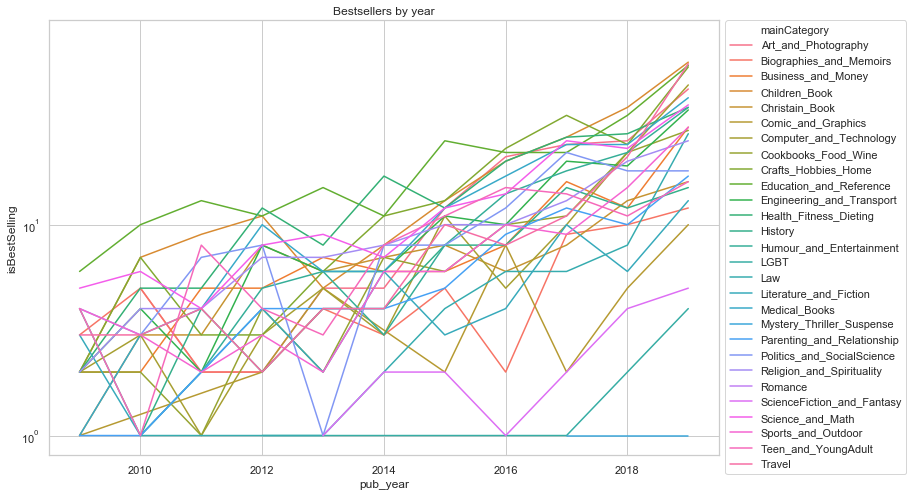

In [108]:
plt.figure(figsize=(12,8))
#sns.set(style = "whitegrid")
allCategory_BestSellers_Cat_Y_filterfig1 = sns.lineplot(x = "pub_year", y= "isBestSelling", hue = "mainCategory", legend="full", data= allCategory_BestSellers_Cat_Y_filter)
sns.color_palette("bright")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
allCategory_BestSellers_Cat_Y_filterfig1.set(yscale='log')
allCategory_BestSellers_Cat_Y_filterfig1.set(Title='Bestsellers by year')

plt.show()

Text(0, 0.5, 'Total number of books sold')

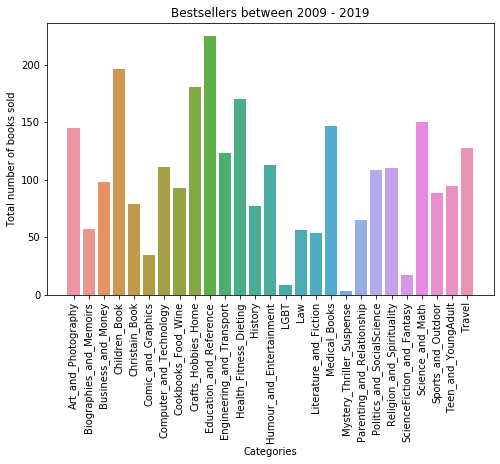

In [65]:
plt.figure(figsize=(8,5))
allCategory_BestSellers_Cat_Y_filterfig2 = sns.barplot(x = "mainCategory", y= "title", data= allCategory_BestSellers_Cat_Y_filter)
plt.xticks(rotation='vertical')
allCategory_BestSellers_Cat_Y_filterfig2.plot(kind='bar', stacked=True)
allCategory_BestSellers_Cat_Y_filterfig2.set(Title='Bestsellers between 2009 - 2019')
plt.xlabel('Categories')
plt.ylabel('Total number of books sold')

[Text(0.5, 1.0, 'Published vs Bestselling by categories')]

<Figure size 1296x864 with 0 Axes>

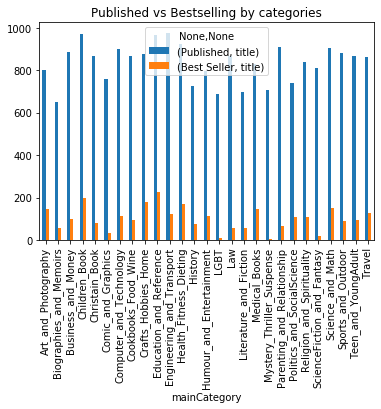

In [101]:
plt.figure(figsize=(18,12))
pub_and_Bestselling = pd.concat({
    'Published': allCategory_booksPerYear.set_index('mainCategory'), 'Best Seller': allCategory_BestSellers_Cat_Y_filter.set_index('mainCategory')
}, axis=1).plot.bar()
pub_and_Bestselling.set(Title='Published vs Bestselling by categories')


In [106]:
#How many best sellers are in each year
allCategory_BestPerYear= allCategory_BestSellers.groupby(['pub_year'],as_index=False)['title'].count()
allCategory_BestPerYear

#books published per year
allCategory_booksPerYear = allCategory_books_filter.groupby(['pub_year'],as_index=False)['title'].count()
allCategory_booksPerYear


pub_year  title
0     2009.0    591
1     2010.0    694
2     2011.0    864
3     2012.0    996
4     2013.0   1127
5     2014.0   1418
6     2015.0   1741
7     2016.0   2367
8     2017.0   3078
9     2018.0   3931
10    2019.0   5785

Text(0, 0.5, 'Total number of best sellers')

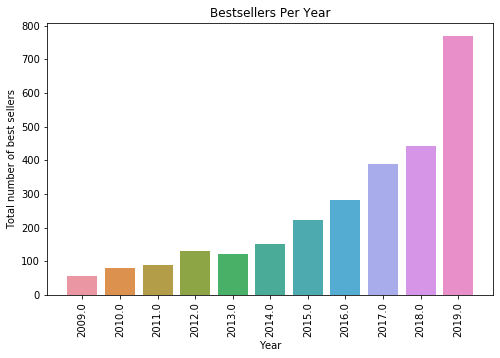

In [74]:
plt.figure(figsize=(8,5))
allCategory_BestSellersPerYearFig = sns.barplot(x = "pub_year", y= "title", data= allCategory_BestPerYear)
plt.xticks(rotation='vertical')
allCategory_BestSellersPerYearFig.plot(kind='bar', stacked=True)
allCategory_BestSellersPerYearFig.set(Title='Bestsellers Per Year')
plt.xlabel('Year')
plt.ylabel('Total number of best sellers')

[Text(0.5, 1.0, 'Published vs Bestselling by Year')]

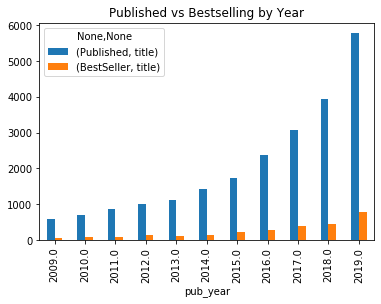

In [112]:
pub_BestsellingY= pd.concat({
    'Published': allCategory_booksPerYear.set_index('pub_year'), 'BestSeller': allCategory_BestPerYear.set_index('pub_year')
}, axis=1).plot.bar()
pub_BestsellingY.set(title = 'Published vs Bestselling by Year')

In [77]:
#mean of bestsellers and allbooks
#allCategory_BestSellers.describe()
allCategory_books.describe()

Unnamed: 0      pub_year
count  33596.000000  33533.000000
mean     599.428801   2017.270271
std      346.374354      3.589650
min        0.000000   1702.000000
25%      299.000000   2016.000000
50%      599.000000   2018.000000
75%      899.000000   2020.000000
max     1199.000000   2021.000000

In [95]:
#average of total number of books displayed vs number of bestsellers
#best sellers vs others
allCategory_books_filter1 = allCategory_books.loc[ (allCategory_books['pub_year'] >= 2009) & (allCategory_books['pub_year'] <= 2019) ]
allCategory_No_Bestsellers = allCategory_books_filter[allCategory_books_filter['isBestSelling'] == False]
#allCategory_No_Bestsellers
avg_allCategory_No_Bestsellers = allCategory_No_Bestsellers.groupby('pub_year').mean()
avg_allCategory_No_Bestsellers.index
avg_allCategory_BestSellers = allCategory_BestSellers.groupby('pub_year').mean()
avg_allCategory_BestSellers.index

Float64Index([2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0,
              2017.0, 2018.0, 2019.0],
             dtype='float64', name='pub_year')

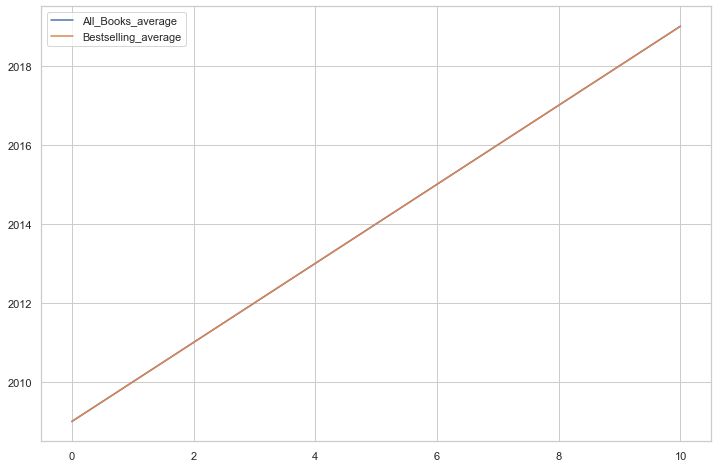

In [96]:
plt.figure(figsize=(12,8))
plt.plot(avg_allCategory_No_Bestsellers.index, label = "All_Books_average")
plt.plot(avg_allCategory_BestSellers.index, label = "Bestselling_average")
plt.legend()
plt.show()

In [105]:
#percentage difference
#allCategory_BestSellers_Cat_Y_filter.pct_change(axis='mainCategory')